# Name: VINOTH MP
# reg.no: 212223240182

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[12045]
single_image.shape


(28, 28)

(60000,)

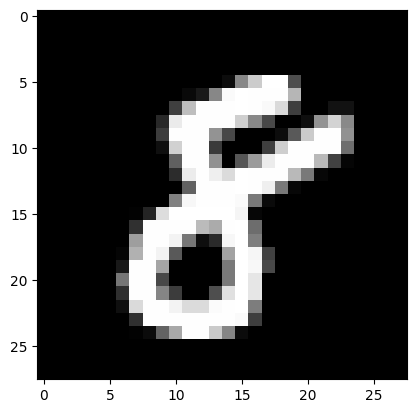

In [ ]:
plt.imshow(single_image,cmap='gray')
y_train.shape


In [ ]:
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()
X_train_scaled.max()
y_train[12045]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
i=keras.Sequential()

In [ ]:
i.add(layers.Input(shape=(28,28,1)))
i.add(layers.Conv2D(filters=32,kernel_size=(3,3)))
i.add(layers.MaxPool2D(pool_size=(2,2)))
i.add(layers.Flatten())
i.add(layers.Dense(32,activation='relu'))
i.add(layers.Dense(32,activation='relu'))
i.add(layers.Dense(10,activation='softmax'))



In [ ]:
i.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [ ]:
i.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.3481 - accuracy: 0.8971 - val_loss: 0.1655 - val_accuracy: 0.9503
Epoch 2/5
469/469 [==============================] - 11s 24ms/step - loss: 0.1395 - accuracy: 0.9588 - val_loss: 0.1171 - val_accuracy: 0.9639
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0710 - accuracy: 0.9785 - val_loss: 0.0673 - val_accuracy: 0.9774
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0561 - accuracy: 0.9832 - val_loss: 0.0637 - val_accuracy: 0.9799


<Axes: >

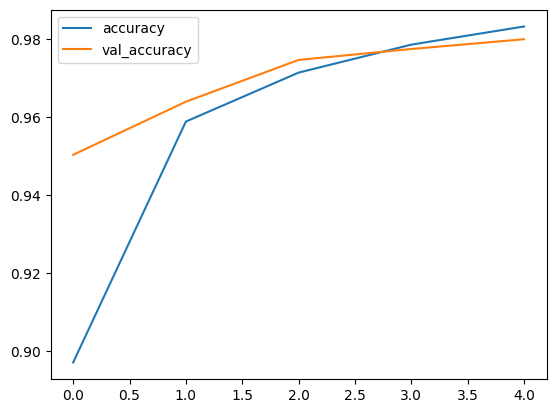

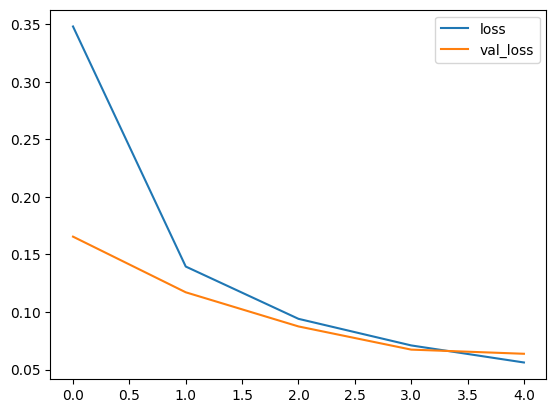

In [ ]:
import pandas as pd
metrics = pd.DataFrame(i.history.history)
metrics.head()

metrics[['accuracy','val_accuracy']].plot()

metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(i.predict(X_test_scaled), axis=1)

print(confusion_matrix(y_test,x_test_predictions))

print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 2s 4ms/step
[[ 971    0    0    1    0    1    2    1    3    1]
 [   0 1126    2    1    1    1    1    1    2    0]
 [   3    2 1005    0    4    0    2   11    4    1]
 [   0    1    3  991    1    3    1    5    5    0]
 [   1    0    0    0  971    0    3    1    2    4]
 [   2    0    0    7    0  875    4    1    3    0]
 [   9    3    1    0    4   10  929    0    2    0]
 [   2    2    8    0    0    0    0 1015    1    0]
 [   5    0    4    2    3    1    0    9  949    1]
 [   3    3    1    4   10    1    0   17    3  967]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97  

In [ ]:
img = image.load_img('/content/download.png')
type(img)

img = image.load_img('/content/download.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

x_single_prediction = np.argmax(
    i.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)




1/1 [==============================] - 0s 14ms/step
[7]


1/1 [==============================] - 0s 21ms/step


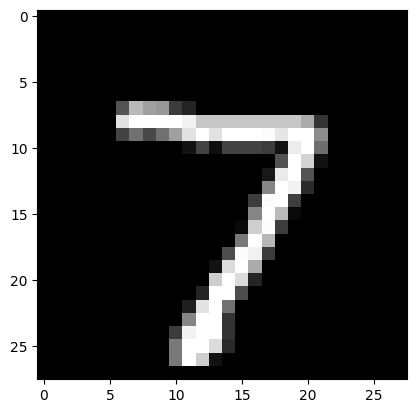

In [ ]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    i.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)